### Laboratorio 7 

### Jose Andres Hernandez Guerra 20053

Objetivos
Laboratorio #7
Semestre I - 2024
- Construir un modelo de DL que utilice imágenes de malware para la clasificación de familias
- Investigar sobre los ataques de evasión, inferencia, extracción y envenenamiento
- Utilizar el framework Adversarial Robustness ToolBox para atacar modelos de ML y DL

### Preámbulo
La clasificación de malware es una tarea que involucra diversos retos. Cada tipo de análisis (estático y dinámico) tiene ventajas y limitaciones. Del lado del análisis estático la velocidad de análisis es su principal característica y su mayor reto consiste en diferenciar las llamadas a las DLLs y APIs sospechosas, de llamadas benignas. En el análisis dinámico la principal ventaja es registrar el comportamiento del malware con todo detalle, pero la preparación del entorno y ejecución requiere una inversión de tiempo y recursos técnicos considerables.
Las redes neuronales convolucionales se usan normalmente en la clasificación de imágenes, y de aquí surge la idea: ¿qué sucede si los bytes de un malware se pasan a una imagen? (artículo “Malware Images: Visualization and Automatic Classification”).

### Desarrollo
El laboratorio consiste en dos partes. En la primera parte, se deberá desarrollar un modelo de Deep Learning que clasifique el malware en base a su imagen. En la segunda parte, se implementarán dos ataques contra el modelo anterior.
Primera parte
Se utilizará el dataset proporcionado en Canvas (maligm_dataset.zip), que contiene imágenes en formato .PNG de 25 familias distintas de malware. Debe realizarse el pre-procesamiento especialmente en el conteo de observaciones por familia. Considere prescindir de familias que tengan pocas observaciones. Plotee las imágenes de malware.
Tip: Utilice el jupyter proporcionado de guía para separa las familias de malware.
Luego construya una red neuronal con las capas/función de activación/optimizador que considere convenientes. Trabaje con 70% entrenamiento y un 30% pruebas, con el número de épocas que considere conveniente (siempre que no ocurra sobreajuste). Muestra las métricas del modelo. Guarde su modelo.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# pyright: reportMissingImports=false
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# Cargar datos
data_dir = "/Users/jose/Documents/GitHub/DatascienceLab7/malimg_paper_dataset_imgs/"

# Por cada archivo/carpeta que existe en el directorio imprime el nombre

for folder in os.listdir(data_dir):
    print(folder)

# labels_path = os.path.join(data_dir, "labels.csv")
# labels_df = pd.read_csv(labels_path)

Swizzor.gen!I
Instantaccess
Dialplatform.B
Autorun.K
Dontovo.A
C2LOP.gen!g
C2LOP.P
Lolyda.AA1
Lolyda.AT
Adialer.C
Fakerean
Rbot!gen
Allaple.A
VB.AT
Yuner.A
Malex.gen!J
Swizzor.gen!E
Agent.FYI
Skintrim.N
Obfuscator.AD
malimg_dataset_readme.txt
Lolyda.AA2
Lolyda.AA3
Wintrim.BX
Allaple.L
Alueron.gen!J


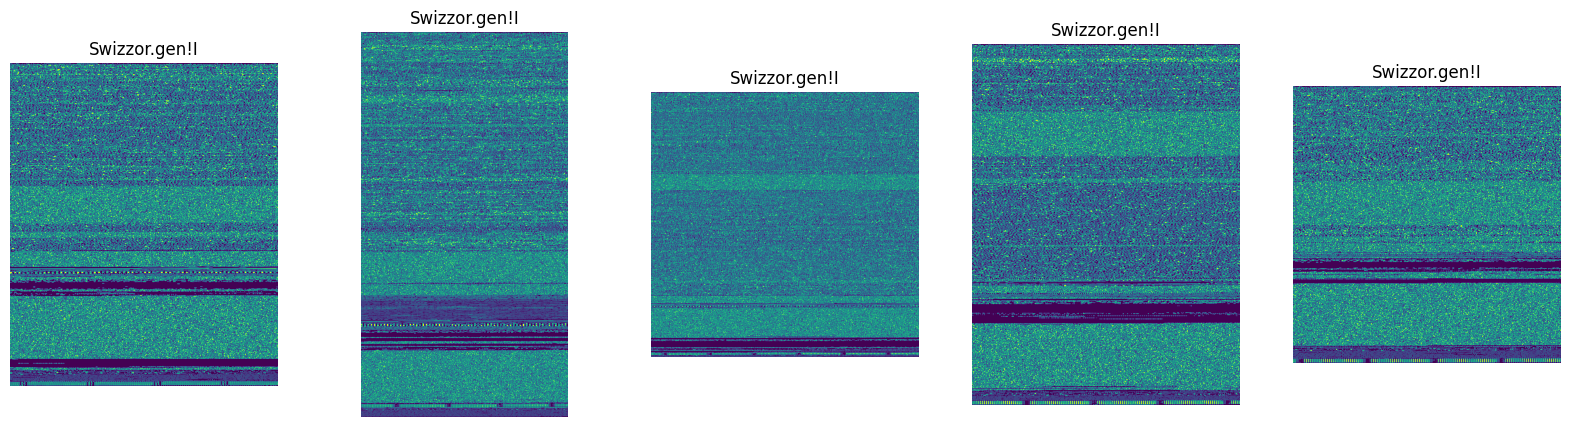

Found 9339 validated image filenames belonging to 25 classes.
Found 0 validated image filenames belonging to 25 classes.
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


291/292 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5109 - loss: 1.6554

ValueError: Must provide at least one structure

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# pyright: reportMissingImports=false
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Directorio donde se encuentran las imágenes
data_dir = "/Users/jose/Documents/GitHub/DatascienceLab7/malimg_paper_dataset_imgs/"

# Obtener la lista de familias de malware
malware_families = os.listdir(data_dir)

# Crear un DataFrame para almacenar la información de las imágenes
image_data = []

# Recorrer las carpetas de las familias de malware
for family in malware_families:
    # Obtener la lista de archivos en la carpeta de la familia
    files = os.listdir(os.path.join(data_dir, family))
    # Agregar la información de cada archivo a image_data
    for file in files:
        image_data.append({
            'file': os.path.join(data_dir, family, file),
            'family': family
        })

# Convertir image_data en un DataFrame
image_df = pd.DataFrame(image_data)

# Visualización de algunas imágenes
def plot_images(image_df, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(20, 5))
    for i, ax in enumerate(axes):
        img_path = image_df.iloc[i]['file']
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(image_df.iloc[i]['family'])
    plt.show()

plot_images(image_df)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    image_df['file'], image_df['family'], test_size=0.3, random_state=42)

# Construcción del generador de imágenes
datagen = ImageDataGenerator(rescale=1./255)

# Generadores de flujo de datos para entrenamiento y prueba
datagen.flow_from_dataframe(
    dataframe=image_df,
    x_col='file',
    y_col='family',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=image_df,
    x_col='file',
    y_col='family',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Construcción del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(malware_families), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluación del modelo
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))


### Cargar datos y exploración inicial

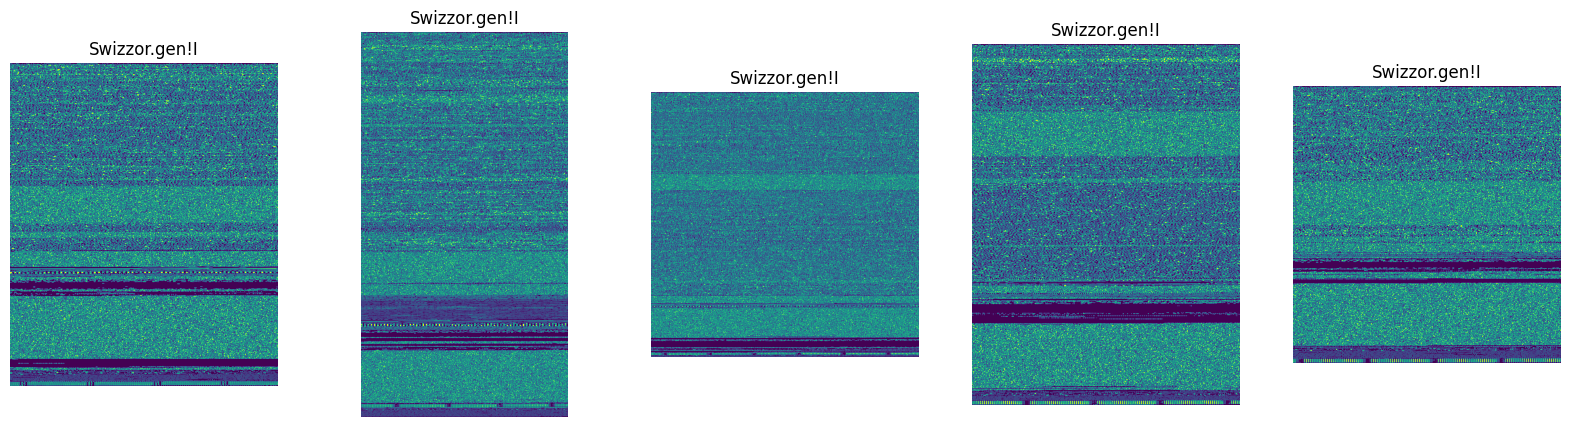

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# pyright: reportMissingImports=false
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Directorio donde se encuentran las imágenes
data_dir = "/Users/jose/Documents/GitHub/DatascienceLab7/malimg_paper_dataset_imgs/"

# Obtener la lista de familias de malware
malware_families = os.listdir(data_dir)

# Crear un DataFrame para almacenar la información de las imágenes
image_data = []

# Recorrer las carpetas de las familias de malware
for family in malware_families:
    # Obtener la lista de archivos en la carpeta de la familia
    files = os.listdir(os.path.join(data_dir, family))
    # Agregar la información de cada archivo a image_data
    for file in files:
        image_data.append({
            'file': os.path.join(data_dir, family, file),
            'family': family
        })

# Convertir image_data en un DataFrame
image_df = pd.DataFrame(image_data)

# Visualización de algunas imágenes
def plot_images(image_df, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(20, 5))
    for i, ax in enumerate(axes):
        img_path = image_df.iloc[i]['file']
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(image_df.iloc[i]['family'])
    plt.show()

plot_images(image_df)

### División de datos en entrenamiento y prueba

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    image_df['file'], image_df['family'], test_size=0.3, random_state=42)

### Configuración de generadores de imágenes

In [11]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=image_df,
    x_col='file',
    y_col='family',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=image_df,
    x_col='file',
    y_col='family',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset=None
)

Found 9339 validated image filenames belonging to 25 classes.
Found 9339 validated image filenames belonging to 25 classes.


### Construcción y entrenamiento del modelo

In [12]:
# pyright: reportMissingImports=false
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(malware_families), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


292/292 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.5225 - loss: 1.5866 - val_accuracy: 0.8910 - val_loss: 0.3900
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.9227 - loss: 0.2658 - val_accuracy: 0.9462 - val_loss: 0.1804
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.9551 - loss: 0.1507 - val_accuracy: 0.9594 - val_loss: 0.1226
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.9625 - loss: 0.1162 - val_accuracy: 0.9704 - val_loss: 0.0928
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.9707 - loss: 0.0905 - val_accuracy: 0.9721 - val_loss: 0.1026
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.9718 - loss: 0.0842 - val_accuracy: 0.9798 - val_loss: 0.0635
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 40s 134ms/step - accuracy: 0.9804 - loss: 0.0624 - val_accuracy: 0.9802 - val_loss: 0.0605
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.9840 - loss: 0.0533 - val

### Evaluación del modelo

In [16]:
from sklearn.metrics import classification_report

# Obtener las etiquetas reales correspondientes a las imágenes de prueba
y_true = test_generator.classes

# Obtener las predicciones del modelo
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_true, y_pred_classes))


292/292 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.02      0.02      0.02       116
           2       0.32      0.32      0.32      2949
           3       0.17      0.17      0.17      1591
           4       0.03      0.03      0.03       198
           5       0.00      0.00      0.00       106
           6       0.01      0.01      0.01       146
           7       0.02      0.02      0.02       200
           8       0.01      0.01      0.01       177
           9       0.01      0.01      0.01       162
          10       0.05      0.05      0.05       381
          11       0.03      0.03      0.03       431
          12       0.01      0.01      0.01       213
          13       0.02      0.02      0.02       184
          14       0.02      0.02      0.02       123
          15       0.01      0.01      0.01       159
          16       0.00      0.00     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [17]:
# Guardar el modelo en formato h5
model.save('malware_classification_model.h5')

Segunda parte
Implemente dos ataques (de diferente categoría), utilizando el framework Adversarial Robustness ToolBox, originalmente desarrollador por IBM, y donado recientemente a The Linux Foundation.
https://adversarial-robustness-toolbox.org/
Este framework contiene módulos de ataque y defensa, métricas, etc; y soporta framewroks como TensorFlow, Keras, Scikit-Learn, PyTorch, etc., todo tipo de data (imágenes, tablas, video, etc.) y tareas de machine learning (clasificación, generación, etc.)
El modelo víctima del ataque será el modelo desarrollado en la primera parte.
Sugerencia: instalar el ART framework y probar los ejemplos vistos en clase, antes de realizar los ataques sobre el modelo víctima, para asegurar que la herramienta fue instalada correctamente y que funciona sin problemas.

In [9]:
import numpy as np
from art.attacks.evasion import FastGradientMethod, ProjectedGradientDescent
from art.estimators.classification import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import tensorflow as tf

# Cargar el modelo guardado
model = load_model('malware_classification_model.h5')

# Crear un clasificador de ART a partir del modelo cargado
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Modificar la función `_initialize_params` para evitar el uso de `placeholder`
def _initialize_params(self, model, use_logits=False, input_layer=0, output_layer=-1):
    import tensorflow as tf
    if hasattr(model, "get_input_shape_at"):
        input_shape = model.get_input_shape_at(input_layer)
    else:
        input_shape = model.layers[input_layer].input_shape
    if hasattr(model, "get_output_shape_at"):
        output_shape = model.get_output_shape_at(output_layer)
    else:
        output_shape = model.layers[output_layer].output_shape
    self._input_shape = input_shape[1:]
    self._output_shape = output_shape[1:]
    self._nb_classes = self._output_shape[0] if len(self._output_shape) == 2 else 1
    self._input_layer = model.layers[input_layer].input
    self._output_layer = model.layers[output_layer].output
    self._input_ph = tf.compat.v1.placeholder_with_default(
        self._input_layer, shape=(None,) + self._input_shape
    )
    self._output_ph = tf.compat.v1.placeholder_with_default(
        self._output_layer, shape=(None,) + self._output_shape
    )
    if use_logits:
        self._output_logits = self._output_layer
    else:
        if self._output_shape[1] == 1:
            self._output_logits = tf.keras.activations.sigmoid(self._output_layer)
        else:
            self._output_logits = tf.keras.activations.softmax(self._output_layer)

KerasClassifier._initialize_params = _initialize_params

# Crear el ataque Fast Gradient Method (FGM)
attack_fgm = FastGradientMethod(estimator=classifier, eps=0.3)

# Crear el ataque Projected Gradient Descent (PGD)
attack_pgd = ProjectedGradientDescent(estimator=classifier, eps=0.3, eps_step=0.1, max_iter=100)

# Generar imágenes adversarias con FGM
X_test_adv_fgm = attack_fgm.generate(x=X_test)

# Generar imágenes adversarias con PGD
X_test_adv_pgd = attack_pgd.generate(x=X_test)

# Obtener las predicciones del modelo en las imágenes adversarias
y_pred_adv_fgm = np.argmax(classifier.predict(X_test_adv_fgm), axis=1)
y_pred_adv_pgd = np.argmax(classifier.predict(X_test_adv_pgd), axis=1)

# Imprimir los reportes de clasificación para las imágenes adversarias
print("Fast Gradient Method (FGM) Attack Report:")


AttributeError: module 'tensorflow.keras.backend' has no attribute 'placeholder'